# Introduction:

    We utilized LogisticRegression, both Naive Bayes, and  SVM models for the algorithm. 
    For testing, we used K-fold validation to test the accuracy, and grid serach when possible. 
 

In [2]:
# load data and imports
import pandas as pd
import seaborn as sbn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

clean_titanic_df = pd.read_csv('preprocessed_titanic.csv')

clean_titanic_df = clean_titanic_df.drop(columns=['Name', 'PassengerId', 'Unnamed: 0'])

train, test= train_test_split(clean_titanic_df,random_state=23, test_size = 0.2)

X_train, y_train = train.drop(columns=['Survived']), train['Survived']
X_test, y_test = test.drop(columns=['Survived']), test['Survived']

clean_titanic_df.head()
clean_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


# Experimental Results variables

In [3]:
kfold_results = {'logistic_regression' : [0, 0], 'categorical_NB': [0,0], 'linear_SVM': [0,0], 'gaussian_NB': [0,0] } # each model is mapped to its average and max result from the k-fold validation

# Testing portion 1:
* LogisticRegression 

* Categorical Naive Bayes : Pclass, Sex, SibSp, Parch, and Embarked are turned into one-hot-encoded attributes. Age and Fare are label encoded(0~n-1)


In [4]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X_log = clean_titanic_df.drop(columns=['Survived'])
y_log = clean_titanic_df['Survived']

X_log_num = X_log[['Age', 'Fare']]

X_log_cat_encoded_Pclass = pd.get_dummies(X_log['Pclass'], prefix='Pclass')
print(X_log_cat_encoded_Pclass)
X_log_cat_encoded_Sex = pd.get_dummies(X_log['Sex'], prefix='Sex')
X_log_cat_encoded_SibSp = pd.get_dummies(X_log['SibSp'], prefix='SibSp')
X_log_cat_encoded_Parch = pd.get_dummies(X_log['Parch'], prefix='Parch')
X_log_cat_encoded_Embarked = pd.get_dummies(X_log['Embarked'], prefix='Embarked')
X_log_cat_encoded = pd.concat([X_log_cat_encoded_Pclass, X_log_cat_encoded_Sex, X_log_cat_encoded_SibSp, X_log_cat_encoded_Parch, X_log_cat_encoded_Embarked], axis=1)

X_log =  X_log_cat_encoded.join(X_log_num)

X_train_log, X_test_log= train_test_split(X_log,random_state=23, test_size = 0.2)

# print(X_train_log)

lor = LogisticRegression(penalty= 'none', max_iter= 1000, solver='newton-cg').fit(X_train_log, y_train)
print(classification_report(y_test, lor.predict(X_test_log)))
print(lor.score(X_test_log, y_test))

     Pclass_1  Pclass_2  Pclass_3
0           0         0         1
1           1         0         0
2           0         0         1
3           1         0         0
4           0         0         1
..        ...       ...       ...
886         0         1         0
887         1         0         0
888         0         0         1
889         1         0         0
890         0         0         1

[891 rows x 3 columns]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       115
           1       0.69      0.66      0.67        64

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179

0.770949720670391


In [5]:
# Apply 10-fold cross validation on logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

i = 0
average_score = 0
max_score = 0
for train_indices, test_indices in kf.split(X_log):
    #print(train_indices)
    start_train, stop_train = train_indices[0], train_indices[-1]+1
    start_test, stop_test = test_indices[0], test_indices[-1]+1
    
    lor = LogisticRegression(penalty= 'none', max_iter= 1000, solver='newton-cg').fit(X_log[start_train:stop_train], y_log[start_train:stop_train])
    print( classification_report( y_log[start_test:stop_test], lor.predict( X_log[start_test:stop_test] ) ) )
    print(lor.score( X_log[start_test:stop_test], y_log[start_test:stop_test] ))
    if max_score < lor.score(X_log[start_test:stop_test], y_log[start_test:stop_test]):
        max_score = lor.score(X_log[start_test:stop_test], y_log[start_test:stop_test])
    average_score += lor.score( X_log[start_test:stop_test], y_log[start_test:stop_test] )
    i+=1
    
print("average score: ", average_score/10)
kfold_results['logistic_regression'][0] = max_score
kfold_results['logistic_regression'][1] = average_score/10

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        51
           1       0.77      0.69      0.73        39

    accuracy                           0.78        90
   macro avg       0.78      0.77      0.77        90
weighted avg       0.78      0.78      0.78        90

0.7777777777777778
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        69
           1       0.60      0.75      0.67        20

    accuracy                           0.83        89
   macro avg       0.76      0.80      0.78        89
weighted avg       0.85      0.83      0.84        89

0.8314606741573034
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        55
           1       0.76      0.65      0.70        34

    accuracy                           0.79        89
   macro avg       0.78      0.76      0.77        89
weighted avg       0.78      0.79   

In [6]:
# try to find optimal max iteration 

max_iterations = [x*100 for x in range(1,10)]

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

for i in max_iterations:
    lor = LogisticRegression(penalty= 'none', max_iter= i, solver='newton-cg').fit(X_train_log, y_train)
    print(classification_report(y_test, lor.predict(X_test_log)))
    print("Score for max iteration of {}".format(i))
    print(lor.score(X_test_log, y_test))
    

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       115
           1       0.69      0.66      0.67        64

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179

Score for max iteration of 100
0.770949720670391
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       115
           1       0.69      0.66      0.67        64

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179

Score for max iteration of 200
0.770949720670391
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       115
           1       0.69      0.66      0.67        64

    accuracy                           0.77       179
   macro avg       0.75      0

## End of Logistic Regression portion

In [7]:
# create age categories (DO NO RUN THIS CELL TWICE! IF RAN A SECOND TIME, MOST VALUES WILL BE TURNED INTO 1):
age_bins = pd.cut( clean_titanic_df['Age'], 10, retbins = True)

i = 0
j = 0
while i < 72:
    clean_titanic_df.loc[(clean_titanic_df['Age'] > i) &  (clean_titanic_df['Age'] <= i +8), 'Age'] = j
    j += 1
    i += 8


In [8]:
# create Fare category

fare_bins = pd.qcut(clean_titanic_df['Fare'], 5, retbins = True)
print(fare_bins)

clean_titanic_df.loc[clean_titanic_df['Fare'] <= 7, 'Fare'] = 0
clean_titanic_df.loc[(clean_titanic_df['Fare'] > 7) & (clean_titanic_df['Fare'] <= 10 ), 'Fare'] = 1
clean_titanic_df.loc[(clean_titanic_df['Fare'] > 10) & (clean_titanic_df['Fare'] <= 21 ), 'Fare'] = 2
clean_titanic_df.loc[(clean_titanic_df['Fare'] > 21) & (clean_titanic_df['Fare'] <= 40 ), 'Fare'] = 3
clean_titanic_df.loc[clean_titanic_df['Fare'] > 40 , 'Fare'] = 4

(0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: Fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]], array([  0.    ,   7.8542,  10.5   ,  21.6792,  39.6875, 512.3292]))


In [9]:
train, test= train_test_split(clean_titanic_df,random_state=23, test_size = 0.2)

X_train, y_train = train.drop(columns=['Survived']), train['Survived']
X_test, y_test = test.drop(columns=['Survived']), test['Survived']

In [10]:
# Categorical Bayes classifier

from sklearn.naive_bayes import CategoricalNB

categorical_NB2 = CategoricalNB()
categorical_NB2.fit(X_train, y_train)
print(classification_report(y_test, categorical_NB2.predict(X_test)))
print(categorical_NB2.score(X_test, y_test))


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       115
           1       0.76      0.64      0.69        64

    accuracy                           0.80       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.80      0.80      0.79       179

0.7988826815642458


In [11]:
# Apply 10-fold cross validation on Categorical Naive Bayes Classifier

from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.naive_bayes import CategoricalNB
kf = KFold(n_splits=10)

X = clean_titanic_df.drop(columns=['Survived'])
y = clean_titanic_df['Survived']

i = 0
average_score = 0
max_score
for train_indices, test_indices in kf.split(X):
    start_train, stop_train = train_indices[0], train_indices[-1]+1
    start_test, stop_test = test_indices[0], test_indices[-1]+1


    categorical_NB2 = CategoricalNB()
    categorical_NB2.fit(X[start_train:stop_train], y[start_train:stop_train])
    print(classification_report(y[start_test:stop_test], categorical_NB2.predict(X[start_test:stop_test])))
    print(categorical_NB2.score(X[start_test:stop_test], y[start_test:stop_test]))
    if max_score < categorical_NB2.score(X[start_test:stop_test], y[start_test:stop_test]):
        max_score = categorical_NB2.score(X[start_test:stop_test], y[start_test:stop_test])
    average_score += categorical_NB2.score(X[start_test:stop_test], y[start_test:stop_test])
    i+=1

print("average score: ", average_score/10)
kfold_results['categorical_NB'][0] = max_score
kfold_results['categorical_NB'][1] = average_score/10

              precision    recall  f1-score   support

           0       0.67      0.75      0.70        51
           1       0.61      0.51      0.56        39

    accuracy                           0.64        90
   macro avg       0.64      0.63      0.63        90
weighted avg       0.64      0.64      0.64        90

0.6444444444444445
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        69
           1       0.43      0.60      0.50        20

    accuracy                           0.73        89
   macro avg       0.65      0.68      0.66        89
weighted avg       0.77      0.73      0.74        89

0.7303370786516854
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        55
           1       0.74      0.68      0.71        34

    accuracy                           0.79        89
   macro avg       0.78      0.77      0.77        89
weighted avg       0.78      0.79   

## End of Categorical Naive Bayes Classifier portion

# Testing portion 2: 
* Gaussian Naive Bayes : Age, Number of sibling, Number of parents, and Fare are used as  numerical attributes

* Linear SVM : Same as Gaussian but joined by One-hot-encoded  PClass, Embarked ,and sex

In [13]:
clean_titanic_df = pd.read_csv('preprocessed_titanic.csv')

clean_titanic_df = clean_titanic_df.drop(columns=['Name', 'PassengerId', 'Unnamed: 0'])


X_Numerical = clean_titanic_df[["Age","SibSp","Parch","Fare"]]
print(X_Numerical)
y_Numerical = clean_titanic_df[["Survived"]]
print(y_Numerical)
X_train, X_test, y_train, y_test =train_test_split(X_Numerical,y_Numerical , test_size = 0.20, random_state = 23)



           Age  SibSp  Parch     Fare
0    22.000000      1      0   7.2500
1    38.000000      1      0  71.2833
2    26.000000      0      0   7.9250
3    35.000000      1      0  53.1000
4    35.000000      0      0   8.0500
..         ...    ...    ...      ...
886  27.000000      0      0  13.0000
887  19.000000      0      0  30.0000
888  29.699118      1      2  23.4500
889  26.000000      0      0  30.0000
890  32.000000      0      0   7.7500

[891 rows x 4 columns]
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [14]:
from sklearn.naive_bayes import GaussianNB

Gaussian_NB = GaussianNB()
Gaussian_NB.fit(X_train, y_train.values.ravel())
print(classification_report(y_test, Gaussian_NB.predict(X_test)))
print(Gaussian_NB.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83       115
           1       0.87      0.31      0.46        64

    accuracy                           0.74       179
   macro avg       0.79      0.64      0.64       179
weighted avg       0.77      0.74      0.70       179

0.7374301675977654


In [29]:
import copy
# using k-fold (10 fold) cross validation
#from sklearn.model_selection import cross_validate
#scores = cross_validate(Gaussian_NB, X_Numerical,y_Numerical.values.ravel(),cv = 10, scoring= ('neg_mean_squared_error' , 'accuracy', 'recall_macro','recall_weighted','f1_macro','f1_weighted') )
#score_total = 0
#MSE_total = 0
#for label in scores:
   # print(label)
#for idx, s in enumerate{scores["test_accuracy"]):
#    print(s)
#    score_total += s
n = 10
kf = KFold(n_splits=n)

X = X_Numerical
y = y_Numerical.values.ravel()

Gaussian_NB = GaussianNB()

def K_fold_report(X,y,k,clf,report= False):
    clf_cpy = copy.deepcopy(clf)
    i = 0
    average_score = 0
    max_score = 0
    kf = KFold(n_splits=n)
    for train_indices, test_indices in kf.split(X):
        #print(str(i) + ": ")
        start_train, stop_train = train_indices[0], train_indices[-1]+1
        start_test, stop_test = test_indices[0], test_indices[-1]+1
        clf_cpy = clf
        clf_cpy.fit(X[start_train:stop_train], y[start_train:stop_train])
        if(report):
            print(classification_report(y[start_test:stop_test], clf_cpy.predict(X[start_test:stop_test])))
            print(clf_cpy.score(X[start_test:stop_test], y[start_test:stop_test]))
        average_score += clf_cpy.score(X[start_test:stop_test], y[start_test:stop_test])
        if max_score < clf_cpy.score(X[start_test:stop_test], y[start_test:stop_test]):
            max_score = clf_cpy.score(X[start_test:stop_test], y[start_test:stop_test])
        i+=1
    print("\n-------->\n")
    print("AVERAGE SCORE: ", average_score/n)
    return [max_score, average_score/n]

kfold_results['gaussian_NB'] = K_fold_report(X,y,n,Gaussian_NB)


-------->

AVERAGE SCORE:  0.6824843945068665


## End of Gaussian Naive Bayes Section

### Using linear kernel for SVM

In [30]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
import numpy as np

clean_titanic_df = pd.read_csv('preprocessed_titanic.csv')
clean_titanic_df = clean_titanic_df.drop(columns=['Name', 'PassengerId', 'Unnamed: 0'])

one_hot_encoder = OneHotEncoder(sparse = False)
categorical = clean_titanic_df[['Pclass', 'Embarked', 'Sex']]
X_Categorical = one_hot_encoder.fit_transform(categorical)
#print((X_Categorical)[0])
#print((X_Categorical)[1])
encoded_all = np.concatenate((X_Categorical,X_Numerical.values),axis = 1)
X_encoded = (pd.DataFrame(data = encoded_all, columns =['Class1','Class2','Class3',
'S','C','Q','Male','Female',
"Age","SibSp","Parch","Fare"]))
y_all = clean_titanic_df[['Survived']].values.ravel()

scaler = StandardScaler()
scaler.fit(X_encoded)
X_encoded = scaler.transform(X_encoded)

n = 10

clf = SVC(kernel='linear')
print(K_fold_report(X_encoded,y_all,n,clf))
kfold_results['linear_SVM'] = K_fold_report(X_encoded,y_all,n,clf)
print(kfold_results)


-------->

AVERAGE SCORE:  0.7867290886392011
[0.8426966292134831, 0.7867290886392011]

-------->

AVERAGE SCORE:  0.7867290886392011
{'logistic_regression': [0.8426966292134831, 0.8081148564294631], 'categorical_NB': [0.8426966292134831, 0.7790511860174781], 'linear_SVM': [0.8426966292134831, 0.7867290886392011], 'gaussian_NB': [0.7415730337078652, 0.6824843945068665]}


In [17]:
# linear svm using hinge loss funciton
#clf = LinearSVC(dual=False) convergence warning
clf = LinearSVC(dual=False)
K_fold_report(X_encoded,y_all,n,clf)


-------->

AVERAGE SCORE:  0.7980024968789016


### Using GridSearch for penalizing coef C

In [18]:
X_train, X_test, y_train, y_test =train_test_split(X_encoded,y_all, test_size = 0.20, random_state = 23)
coef_C = [a *0.2 for a in range(1,6)]
for item in coef_C:
    clf = LinearSVC(dual=False, C= item)
    clf.fit(X_train,y_train)
    print(classification_report(y_test, clf.predict(X_test)))
    print(clf.score(X_test, y_test))


              precision    recall  f1-score   support

           0       0.81      0.83      0.82       115
           1       0.68      0.64      0.66        64

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.77      0.76       179

0.7653631284916201
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       115
           1       0.68      0.64      0.66        64

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.77      0.76       179

0.7653631284916201
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       115
           1       0.68      0.64      0.66        64

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.77   

### Using non-linear kernel for SVM

In [35]:
print("\nPolynomial: ")
clf = SVC(kernel='poly',decision_function_shape = 'ovo')
K_fold_report(X_encoded,y_all,n,clf)

print("\nRBF: ")
clf = SVC(kernel='rbf',gamma = 5 ,decision_function_shape = 'ovo')
kfold_results['rbf_SVM'] = K_fold_report(X_encoded,y_all,n,clf)

print("\nSigmoid: ")
clf = SVC(kernel='sigmoid',decision_function_shape = 'ovo')
K_fold_report(X_encoded,y_all,n,clf)



Polynomial: 

-------->

AVERAGE SCORE:  0.8272034956304619

RBF: 

-------->

AVERAGE SCORE:  0.8677403245942573

Sigmoid: 

-------->

AVERAGE SCORE:  0.6655181023720349


[0.7303370786516854, 0.6655181023720349]

In [20]:
print("\n OVR Curves <------------------------> \n")
print("\nPolynomial: ")
clf = SVC(kernel='poly',decision_function_shape = 'ovr')
K_fold_report(X_encoded,y_all,n,clf)

print("\nRBF: ")
clf = SVC(kernel='rbf',gamma = 'auto' ,decision_function_shape = 'ovr')
K_fold_report(X_encoded,y_all,n,clf,True)

print("\nSigmoid: ")
clf = SVC(kernel='sigmoid',decision_function_shape = 'ovr')
K_fold_report(X_encoded,y_all,n,clf)



 OVR Curves <------------------------> 


Polynomial: 

-------->

AVERAGE SCORE:  0.8272034956304619

RBF: 
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        51
           1       0.93      0.64      0.76        39

    accuracy                           0.82        90
   macro avg       0.85      0.80      0.81        90
weighted avg       0.84      0.82      0.82        90

0.8222222222222222
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        69
           1       0.75      0.60      0.67        20

    accuracy                           0.87        89
   macro avg       0.82      0.77      0.79        89
weighted avg       0.86      0.87      0.86        89

0.8651685393258427
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        55
           1       0.84      0.62      0.71        34

    accuracy                      

{'logistic_regression': [0.8426966292134831, 0.8081148564294631], 'categorical_NB': [0.8426966292134831, 0.7790511860174781], 'linear_SVM': [0.8426966292134831, 0.7867290886392011], 'gaussian_NB': [0.7415730337078652, 0.6824843945068665], 'rbf_SVM': [0.9325842696629213, 0.8677403245942573]}
[0 1 2 3 4]


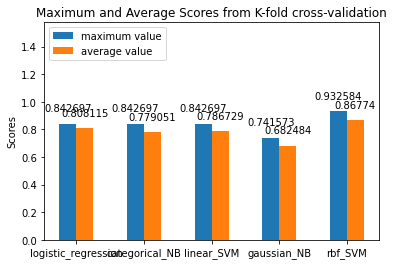

In [73]:
print(kfold_results)

labels = []
maxs = []
avgs = []

for key, value in kfold_results.items():
    
    labels.append(key)
    maxs.append(value[0])
    avgs.append(value[1])
    
x = np.arange(len(labels))  # the label locations
print(x)
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, maxs, width, label='maximum value')
rects2 = ax.bar(x + width/2, avgs, width, label='average value')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Maximum and Average Scores from K-fold cross-validation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=10)
ax.bar_label(rects2, padding=10)
plt.plot(4, 1.5)
plt.show()

# dual form = true: warning
# coef C is not working for reqularization
# how to search gamma

## End of SVM Section